In [ ]:
%matplotlib inline
import matplotlib
import seaborn as sns
sns.set()
matplotlib.rcParams['figure.dpi'] = 144

# Intro to Machine Learning and Scikit-learn

<!-- requirement: images/ml_function.png -->
<!-- requirement: images/feature_matrix.png -->


In this notebook we will cover some basics of machine learning and give an introduction to Scikit-learn. Some things to think about: 

* What is machine learning?
* What sorts of problems does machine learning solve?
* When is machine learning not useful?


## What is machine learning?

Machine learning is:

* a suite of tools 
* used in a wide variety of circumstances
* used to predict attributes of new data
* used to understand attributes of already available data
* under active research and development

Machine learning is not:

* a magical solution to all problems
* useful in every situation
* always to helpful to understand *why*

*Question: What are the possible drawbacks with relying on algorithms to understand data?*

There are two types of learning, *supervised* and *unsupervised* learning.  We will first talk about supervised learning and come back to unsupervised learning later.

## Supervised Learning

In supervised learning, we start with a set of data and a set of labels or outcomes and build a model with the ability to predict new labels from new data.

Let’s start with an example where we attempt to solve the following problem: 

*Given a ball thrown straight up in the air with some initial velocity, $v_0$, how long does the ball take to hit the ground?*

We can appeal to physics to provide an answer, however, if we do not remember classical mechanics (or we are confronted with a different problem not possessing a closed form solution) we could instead do the following.
1. Collect data for many different launch velocities in the form of $(v_0, t_{ground})$
2. Train a machine learning model
3. Predict time to ground for any launch velocity

Instead of building the model using our knowledge of physics, we allow the computer to build a model for us!

*Question: In what other situations do we use models built by computers?  Is this machine learning?*

More specifically, supervised machine learning allows us to take a *training* data set, $X$ and build a function $f(X)=y$  where $y_i$ are the corresponding labels.  In this example, $X$ represents the velocities we test and $y$ is the corresponding set of times to ground.  In practice, this function will have as an input both the attributes of the training set and another set of *hyperparameters*.  This will let us take any set of data $X'$ and predict labels $y'=f(X')$ as long as $X$ and $X'$ carry the same type of information.

![machine_learning_function](images/ml_function.png)

Mathematically, these quantities are usually represented in the language of linear algebra as matrices and vectors (in the normal Python ecosystem, these are NumPy arrays).  $X$ is a matrix where:

 * **rows** correspond the different observations or data points
 * **columns** correspond to different *features* (data attributes)
 
For example, if we have a (very small) data set which has three features $f_0,f_1,f_2$ and four observations, we can represent this as a 4x3 matrix.
 
![feature_matrix](images/feature_matrix.png)

 
$y$ is a vector of labels which we know for only the training data set.  Once we train a model, we can take unlabeled data $X'$ and predict $y'$.  Note, the columns of $X'$ must be the same as $X$ or our model will not work.

*Question: If we test $n$ different initial velocities, what are the shapes of $X$ and $y$?*

The model function $f$ will take a row of $X$, $x_i$ and return $y_i$, the corresponding label. Many functions will do this, in our example of throwing a ball, we can say $f(x) = 5$ or $f(x)=x$, both valid functions, but probably not great models.  By a *good* model, we mean that for feature matrix $X$ and corresponding known labels $y$, the predictions $f(X)$ are in some sense close to $y$.  There is an entire notebook which will make the notion of  *close* more precise (and there is more than one definition), but for now we can take this as the distance between the two vectors $y$ and $f(X)$.

With a properly chosen set of hyperparameters $\beta_i$, the returned vector $f(X)$ is as close as possible to $y$ given the model choice and feature selection, thus $f$ is a candidate model for predictive purposes. Of course there are always caveats with regards to predicting attributes of new data.  For example, lets suppose that we are working with one dimensional data which is actually described by $y= \sin(x/5)$ (perhaps for some physical reason).  If the given data falls in the range of $x \in (0,1)$, then we know that our data will be described quite well by the function $f(x_i)=x/5$.

*Question: Why?  When is this true?*

Let's make a plot of these two functions to confirm this:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
x = np.linspace(0,15,20)
fig, ax = plt.subplots()
axins = fig.add_axes([0.15,.55,.35,.3])
axins.set_xlim(0, 2)
axins.set_ylim(0, .45)
for axis in [ax, axins]:
    axis.plot(x, x/5, label='x/5')
    axis.plot(x, np.sin(x/5),'--',label='sin(x/5)')
   
plt.xticks(visible=False)
plt.yticks(visible=False)
for spine in ['top','bottom','left','right']:
    axins.spines[spine].set_edgecolor('r')
    axins.spines[spine].set_linewidth(1)
    
rect = Rectangle((0,0), 2,.45, facecolor='none',edgecolor='r', lw=1)

ax.add_patch(rect)    
ax.legend(loc=1, frameon=True)

We see that this approximation is valid for small $x$, but quite poor for $x \gg 2$.  If we only have data in (0,1), we can reasonably fit a simple line and our model will work quite well for small $x$.  However, if we then try to use this model to extrapolate to larger $x$ values, it will perform quite poorly.  Thus when using a model to make predictions, one must be sure to consider the regime of validity of the model. 

For a more concrete example, if given two weeks of stock market data, one might be able to extrapolate for a day or two, but it would be much more difficult to extrapolate for twenty years into the future.  Once a function has been trained, it will happily make predictions for almost any input matrix of the proper shape, it is your job as a data scientist to choose when those numbers make sense.

*Question: What are some good checks on model validity?*

## Using Scikit-learn

Now lets train a first model using Scikit-learn, a widely used python package for machine learning.  First lets make a set of data which is linear, but with some added noise.  This data will have a slope of 2 and an intercept of 3.

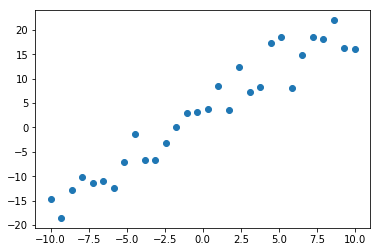

In [2]:
X = np.linspace(-10,10,30)
y = 2 * X + 3 + 4*np.random.randn(X.shape[0])
plt.plot(X, y, 'o')

Now we can import a linear model from Scikit-learn and use it to train the model.  Don't worry if this looks like magic at this point, we will explain how it works shortly.

In [5]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X.reshape(-1,1), y) # reshape to column vector
print('Intercept = {:.2f}'.format(lr.intercept_))
print('Slope = {:.2f}'.format(lr.coef_[0]))

Intercept = 2.77
Slope = 1.89


Not bad!  We have recovered numbers that match the data with the difference attributable to the simulated noise.

We can also look at this model overlaid with the data and the line without noise.  Note that we are computing the model prediction line from our linear regression function.

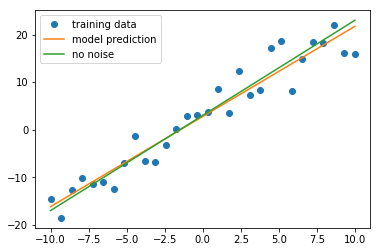

In [6]:
plt.plot(X, y, 'o', label='training data')
plt.plot(X, lr.predict(X.reshape(-1,1)), label='model prediction')
plt.plot(X, 2*X+3, label='no noise')
plt.legend()

We have built our first machine learning model!  The power of this model lies in the fact that although our data exists for only 30 points, we can now use it to predict values for *any* point.  In particular, we can have some confidence that within the range (-10,10), our model should work pretty well.

*Question: Are linear models useful when the data is non-linear? If so, when?*

## Scikit-learn classes

Scikit-learn has a nice object oriented interface based on the idea of an estimator.  For now, we can think of an estimator as an interface which exposes functionality to do a few things:
* **transform** data
* **fit** data
* **predict** labels from features

as well as a few other things.  One such estimator is the `LinearRegression` class we used above.  To make our lives as programmers easy (as well as enable all sorts of pipelining and chaining), Scikit-learn implements these estimators with a unified interface.  The upshot is that using different methods is often as easy as swapping out class initialization.  The only potential issue is that Scikit-learn enables data scientists to swap in and out a bunch of models without considering which one is the proper one.

*Question: What are some things which might make a model well suited for a specific problem*

Some important methods implemented in the different estimator classes are:

* **fit(X, y)** - fit the feature matrix $X$ to the hyperparameters in model with fitting label vector y.  Returns the fitted model
* **predict(X)** - predict the labels for feature matrix $X$ given the fitted model.  Returns a list of predictions where each prediction $y_i$ corresponds to a row in the feature matrix.
* **transform(X)** - transform feature matrix $X$.  Returns the transformed feature matrix.
* **fit_transform(X, y)** - fit and transform in a single step.


With just these methods, we can already use a great deal of the functionality of Scikit-learn. Let’s look at the public methods in the `LinearRegression` class we used before.

In [ ]:
[method_name for method_name in dir(LinearRegression) if method_name[0] != '_']

 Take a guess at what the other methods do.  Remember, in the notebook we can always use `?method` (or `method?`) or print the docstring to see what the method does.  Scikit-learn has great documentation, so please make use of it!

In [ ]:
print(LinearRegression.fit.__doc__)

## Scikit-learn classes example

For an example, we will look at the California housing data set.  First we can load it into memory and print out a description.

In [ ]:
from sklearn.datasets import fetch_california_housing
data_california = fetch_california_housing()
X = data_california['data']
y = data_california['target']
print(data_california['DESCR'])

Our predictions will proceed in three steps
1. scale the data
2. fit a regressor using the gradient boosting algorithm
3. make predictions

Again, the point here is not to understand what each of these steps are doing (although we encourage you to look them up), but to show an example of how to use Scikit-learn on a real data set.

First we will import two estimators, `StandardScaler` and `GradientBoostingRegressor`, which will scale the data and fit the data respectively.  We will also import a convenience function to split the data set into testing and training sets.  A testing set is some data we keep on the side so we can look at how well our models does on data which is not in the training set.

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

First we will split the data set and then fit the `StandardScaler` to the training set and scale the test set.

In [ ]:
X_train_unscaled, X_test_unscaled, y_train, y_test = train_test_split(X, y, test_size=.2)
scale = StandardScaler()
X_train = scale.fit_transform(X_train_unscaled)
X_test = scale.transform(X_test_unscaled)

fitting the data is as easy as using the **fit** method of the `GradientBoostingRegressor`.  The **fit** method always returns *self*, an estimator, so in this case model is also a `GradientBoostingRegressor`

In [ ]:
model = GradientBoostingRegressor().fit(X_train, y_train)

Now we can make predictions for the test set, and look at how well we did.

In [ ]:
score = model.score(X_test, y_test)
print('R^2 = {:.3f}'.format(score))

One other bit of information we can easily access with this is the relative importance of each feature of the data set.

In [ ]:
x = list(range(X_train.shape[1]))
plt.bar(x,model.feature_importances_)
plt.xticks(x, data_california['feature_names'], rotation='vertical');

So with only a few commands, we can fit a reasonably good machine learning model to a data set and even get some insight into the relative importance of the features.  Later sections will teach you how to write custom estimators as well as go into the details of the estimators, but it is important to note that much of Scikit-learn can be used as a veritable black box.  While this is a testament to a well designed application, it can also be dangerous.  Make sure you understand the models you are using and why you are using them before trying to come to conclusions about your data.

## Unsupervised learning

Sometimes we are not interested in using labeled data to build predictive models, but rather finding new attributes that allow us to understand unlabeled data in a simpler way.  This falls into the domain of *unsupervised* learning.  Common types of unsupervised learning including clustering and dimensionality reduction.  

To illustrate the difference between supervised and unsupervised learning, consider attempting to understand customer behavior at a retail store.  A supervised problem might be predicting the probability of customer buying something at the store given attributes like time spent browsing, age, time of day, etc with labels of purchased an item or not purchased an item.  An unsupervised problem might be figuring out how many types of different customers exist.  The latter case involves creating the set of labels that can be assigned to each data point.

We can also use Scikit-learn to solve some of these problems with the same interface we have already explored.

For a simple example, we will use the iris data set, a canonical example for machine learning.  This set contains a few features for flowers drawn from three different species.  The questions we will try to answer is: Can we separate our data set into three categories of flowers?

This is different from a similar question, can we classify each flower into a particular species, as we are not trying to determine which species each individual flower belongs to, instead, we are trying to find flowers which are similar to each other.

In [ ]:
from sklearn.datasets import load_iris
data = load_iris()
print(data['DESCR'])

In [ ]:
X = StandardScaler().fit_transform(data['data'])
y = data['target']
feature_names = ['scaled {}'.format(i) for i in data['feature_names']]

We can plot two observations below, in this case sepal width and petal length.

In [ ]:
plt.scatter(X[:,1], X[:,2])
plt.xlabel(feature_names[1])
plt.ylabel(feature_names[2])

We will make use of a K means clustering algorithm here even though as we will learn later, it tends to not work as well when each cluster does not have symmetric variance along all of the axes.

We will initialize the estimator and then use the **fit_predict** method which both fits the estimator to the data and then predicts the cluster of each of the data points.

In [ ]:
from sklearn.cluster import KMeans
y_pred = KMeans(n_clusters=3).fit_predict(X[:,1:3])

We now plot the predicted cluster labels on the left and the true cluster labels on the right

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(9,4))
for i, (label, c) in enumerate(zip(['predicted','actual'],[y_pred, y])):
    ax[i].scatter(X[:,1], X[:,2], c=c,cmap=plt.cm.viridis)
    ax[i].set_xlabel(feature_names[1])
    ax[i].set_ylabel(feature_names[2])
    ax[i].set_title(label)

This does a fairly good job without any hyperparameter tuning!

While clustering does not give specific labels for each data point, it does give relative labels for the points which can aid in extracting important information about the data.  For example, if I want to figure out which variables give the best description of the data without considering all of the variables, I could look at which variables give the clearest clusters.

Unsupervised learning is often a crucial part of supervised learning.  Most machine learning algorithms will scale with the number of features, so with large data sets, eliminating unimportant features can aid in the calculation speed for fitting and predicting.  In this case, unsupervised learning is used to figure out which features are important to reduce the number of features necessary for a good model.

*Question: If I am choosing people for my math league team and I know their math grades, their major in college, and their height, which feature is most likely unimportant?*

## Additional resources

1. [Scikit-learn tutorials](http://scikit-learn.org/stable/tutorial/index.html)
2. [Wikipedia](https://en.wikipedia.org/wiki/Machine_learning)


*Copyright &copy; 2017 The Data Incubator.  All rights reserved.*